# Preliminaries

The `pandas` library allows the user several data structures for different data manipulation tasks:
1. Data storage through its `Series` and `DataFrame` data structures.
2. Data filtering using multiple methods from the package.
3. Reading data from many different file formats such as `csv`, `txt`, `xlsx`, ...

Below we provide a brief overview of the `pandas` functionalities needed for these exercises. The complete documentation can be found on the [`pandas` website](https://pandas.pydata.org/).

## Pandas data structures

### Series
The Pandas Series data structure is similar to a one-dimensional array. It can store any type of data. The values are mutable but the size not.

To create `Series`, we call the `pd.Series()` method and pass an array. A `Series` may also be created from a numpy array.

In [24]:
import pandas as pd
import numpy as np

first_series = pd.Series([1,10,100,1000])

print(first_series)

teams = np.array(['PSV','Ajax','Feyenoord','Twente'])
second_series = pd.Series(teams)

print('\n')
print(second_series)

0       1
1      10
2     100
3    1000
dtype: int64


0          PSV
1         Ajax
2    Feyenoord
3       Twente
dtype: object


### DataFrame
One can think of a `DataFrame` as a table with rows and columns (2D structure). The columns can be of a different type (as opposed to `numpy` arrays) and the size of the `DataFrame` is mutable.

To create `DataFrame`, we call the `pd.DataFrame()` method and we can create it from scratch or we can convert a numpy array or a list into a `DataFrame`.

In [25]:
# DataFrame from scratch
first_dataframe = pd.DataFrame({
    "Position": [1, 2, 3, 4],
    "Team": ['PSV','Ajax','Feyenoord','Twente'],
    "GF": [80, 75, 75, 70],
    "GA": [30, 25, 40, 60],
    "Points": [79, 78, 70, 66]
})

print("From scratch: \n {} \n".format(first_dataframe))

# DataFrme from a list
data = [[1, 2, 3, 4], ['PSV','Ajax','Feyenoord','Twente'], 
        [80, 75, 75, 70], [30, 25, 40, 60], [79, 78, 70, 66]]
columns = ["Position", "Team", "GF", "GA", "Points"]

second_dataframe = pd.DataFrame(data, index=columns)

print("From list: \n {} \n".format(second_dataframe.T)) # the '.T' operator is explained later on

# DataFrame from numpy array
data = np.array([[1, 2, 3, 4], ['PSV','Ajax','Feyenoord','Twente'], 
                 [80, 75, 75, 70], [30, 25, 40, 60], [79, 78, 70, 66]])
columns = ["Position", "Team", "GF", "GA", "Points"]

third_dataframe = pd.DataFrame(data.T, columns=columns)

print("From numpy array: \n {} \n".format(third_dataframe))

From scratch: 
    Position       Team  GF  GA  Points
0         1        PSV  80  30      79
1         2       Ajax  75  25      78
2         3  Feyenoord  75  40      70
3         4     Twente  70  60      66 

From list: 
   Position       Team  GF  GA Points
0        1        PSV  80  30     79
1        2       Ajax  75  25     78
2        3  Feyenoord  75  40     70
3        4     Twente  70  60     66 

From numpy array: 
   Position       Team  GF  GA Points
0        1        PSV  80  30     79
1        2       Ajax  75  25     78
2        3  Feyenoord  75  40     70
3        4     Twente  70  60     66 



### DataFrame attributes
This section gives a quick overview of some of the `pandas.DataFrame` attributes such as `T`, `index`, `columns`, `iloc`, `loc`, `shape` and `values`.

In [26]:
# transpose the index and columns
print(third_dataframe.T)

            0     1          2       3
Position    1     2          3       4
Team      PSV  Ajax  Feyenoord  Twente
GF         80    75         75      70
GA         30    25         40      60
Points     79    78         70      66


In [27]:
# index makes reference to the row labels
print(third_dataframe.index)

RangeIndex(start=0, stop=4, step=1)


In [28]:
# columns makes reference to the column labels
print(third_dataframe.columns)

Index(['Position', 'Team', 'GF', 'GA', 'Points'], dtype='object')


In [29]:
# iloc allows to access the index by integer-location (e.g. all team names, which are in the second columm)
print(third_dataframe.iloc[:,1])

0          PSV
1         Ajax
2    Feyenoord
3       Twente
Name: Team, dtype: object


In [30]:
# loc allows to access the index by label(s)-location (e.g. all team names, which are in the "Team" columm)
print(third_dataframe.loc[0, 'Team'])

PSV


In [31]:
# shape returns a tuple with the DataFrame dimension, similar to numpy
print(third_dataframe.shape)

(4, 5)


In [32]:
# values return a Numpy representation of the DataFrame data
print(third_dataframe.values)

[['1' 'PSV' '80' '30' '79']
 ['2' 'Ajax' '75' '25' '78']
 ['3' 'Feyenoord' '75' '40' '70']
 ['4' 'Twente' '70' '60' '66']]


### DataFrame methods
This section gives a quick overview of some of the `pandas.DataFrame` methods such as `head`, `describe`, `concat`, `groupby`,`rename`, `filter`, `drop` and `isna`. To import data from CSV or MS Excel files, we can make use of `read_csv` and `read_excel`, respectively.

In [33]:
# print the first few rows in your dataset with head()
print(third_dataframe.head()) # In this case, it is not very useful because we don't have thousands of rows

  Position       Team  GF  GA Points
0        1        PSV  80  30     79
1        2       Ajax  75  25     78
2        3  Feyenoord  75  40     70
3        4     Twente  70  60     66


In [34]:
# get the summary statistics of the DataFrame with describe()
print(third_dataframe.describe())

       Position       Team  GF  GA Points
count         4          4   4   4      4
unique        4          4   3   4      4
top           2  Feyenoord  75  25     79
freq          1          1   2   1      1


In [35]:
# concatenate (join) DataFrame objects using concat()

# first, we will split the above DataFrame in two different ones
df_a = third_dataframe.loc[[0,1],:]
df_b = third_dataframe.loc[[2,3],:]

print(df_a)
print('\n')

print(df_b)
print('\n')

# now, we concatenate both datasets
df = pd.concat([df_a, df_b])

print(df)

  Position  Team  GF  GA Points
0        1   PSV  80  30     79
1        2  Ajax  75  25     78


  Position       Team  GF  GA Points
2        3  Feyenoord  75  40     70
3        4     Twente  70  60     66


  Position       Team  GF  GA Points
0        1        PSV  80  30     79
1        2       Ajax  75  25     78
2        3  Feyenoord  75  40     70
3        4     Twente  70  60     66


In [36]:
# group the data by certain variable via groupby()
# here, we have grouped the data by goals for, which in this case is 75

group = df.groupby('GF')

print(group.get_group('75'))

  Position       Team  GF  GA Points
1        2       Ajax  75  25     78
2        3  Feyenoord  75  40     70


In [37]:
# rename() helps you change the column or index names
print(df.rename(columns={'Position':'Pos','Team':'Club'}))

  Pos       Club  GF  GA Points
0   1        PSV  80  30     79
1   2       Ajax  75  25     78
2   3  Feyenoord  75  40     70
3   4     Twente  70  60     66


In [38]:
# build a subset of rows or columns of your dataset according to labels via filter()
# here, items refer to the variable names: 'Team' and 'Points'; to select columns, we specify axis=1
print(df.filter(items=['Team', 'Points'], axis=1))

        Team Points
0        PSV     79
1       Ajax     78
2  Feyenoord     70
3     Twente     66


In [39]:
# dropping some labels
print(df.drop(columns=['GF', 'GA']))

  Position       Team Points
0        1        PSV     79
1        2       Ajax     78
2        3  Feyenoord     70
3        4     Twente     66


In [40]:
# search for NA (not available) entries in the DataFrame
print(df.isna()) # No NA values
print('\n')

# create a pandas Series with a NA value
# the Series as W (winnin matches)
tmp = pd.Series([np.NaN, 25, 24, 19],  name="W")

# concatenate the Series with the DataFrame
df = pd.concat([df,tmp], axis = 1)
print(df)
print('\n')

# again, check for NA entries
print(df.isna())

   Position   Team     GF     GA  Points
0     False  False  False  False   False
1     False  False  False  False   False
2     False  False  False  False   False
3     False  False  False  False   False


  Position       Team  GF  GA Points     W
0        1        PSV  80  30     79   NaN
1        2       Ajax  75  25     78  25.0
2        3  Feyenoord  75  40     70  24.0
3        4     Twente  70  60     66  19.0


   Position   Team     GF     GA  Points      W
0     False  False  False  False   False   True
1     False  False  False  False   False  False
2     False  False  False  False   False  False
3     False  False  False  False   False  False


## Dataset

For this week exercises we will use a dataset from the Genomics of Drug Sensitivity in Cancer (GDSC) project (https://www.cancerrxgene.org/). In this study (['Iorio et al., Cell, 2016']()), 265 compounds were tested on 1001 cancer cell lines for which different types of -omics data (RNA expression, DNA methylation, Copy Number Alteration, DNA sequencing) are available. This is a valuable resource to look for biomarkers of drugs sensitivity in order to try to understand why cancer patients responds very differently to cancer drugs and find ways to assign the optimal treatment to each patient.

For this exercise we will use a subset of the data, focusing the response to the drug YM155 (Sepantronium bromide) on four cancer types, for a total of 148 cancer cell lines.

| ID          | Cancer type                      |
|-------------|----------------------------------|
|   COAD/READ | Colorectal adenocarcinoma        |
|   NB        | Neuroblastoma                    |
|   KIRC      | Kidney renal clear cell carcinoma|
|   BRCA      | Breast carcinoma                 |

We will use the RNA expression data (RMA normalised). Only genes with high variability across cell lines (variance > 5, resulting in 238 genes) have been kept.

Drugs have been tested at different concentration, measuring each time the viability of the cells. Drug sensitivity is measured using the natural log of the fitted IC50 metric, which is defined as the half maximal inhibitory concentration. A lower IC50 corresponds to a more sensitive cell line because a lower amount of drug is sufficient to have a strong response, while a higher IC50 corresponds to a more resistant cell line because more drug is needed for killing the cells.

Based on the IC50 metric, cells can be classified as sensitive or resistant. The classification is done by computing the $z$-score across all cell lines in the GDSC for each drug, and considering as sensitive the ones with $z$-score < 0 and resistant the ones with $z$-score > 0.

The dataset is originally provided as 3 files ([original source](https://www.sciencedirect.com/science/article/pii/S0092867416307462?via%3Dihub)) :

`GDSC_RNA_expression.csv`: gene expression matrix with the cell lines in the rows (148) and the genes in the columns (238).

`GDSC_drug_response.csv`: vector with the cell lines response to the drug YM155 in terms of log(IC50) and as classification in sensitive or resistant.

`GDSC_metadata.csv`: metadata for the 148 cell lines including name, COSMIC ID and tumor type (using the classification from ['The Cancer Genome Atlas TCGA'](https://www.cancer.gov/about-nci/organization/ccg/research/structural-genomics/tcga))

For convenience, we provide the data already curated.

`RNA_expression_curated.csv`: [148 cell lines , 238 genes]

`drug_response_curated.csv`: [148 cell lines , YM155 drug]

The curated data cam be read as `pandas` `DataFrame`s in the following way:

In [4]:
gene_expression = pd.read_csv("./data/RNA_expression_curated.csv", sep=',', header=0, index_col=0)
drug_response = pd.read_csv("./data/drug_response_curated.csv", sep=',', header=0, index_col=0)
print(drug_response.columns)


,YM155
949176,0.42
749714,-4.31
749709,-4.80
1660034,-0.88
1240123,1.82


You can use the `DataFrame`s directly as inputs to the the `sklearn` models. The advantage over using `numpy` arrays is that the variable are annotated, i.e. each input and output has a name.

## Tools
The `scikit-learn` library provides the required tools for linear regression/classification and shrinkage, as well as for logistic regression.

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression

Note that the notation used for the hyperparameters in the `scikit-learn` library is different from the one used in the lecture. More specifically, in the lecture $\alpha$ is the tunable parameter to select the compromise between Ridge and Lasso. Whereas, `scikit-learn` library refers to `alpha` as the tunable parameter $\lambda$. Please check the documentation for more details.

# Exercises

## Selection of the hyperparameter

Implement cross-validation (using `sklearn.grid_search.GridSearchCV`) to select the `alpha` hyperparameter of `sklearn.linear_model.Lasso`. 

The best alpha parameter is 0.94


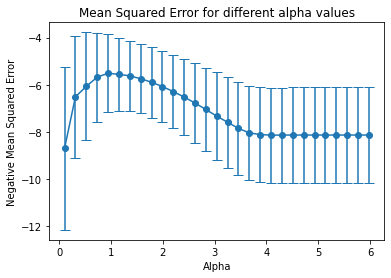

In [43]:
from sklearn.utils import resample
from sklearn.model_selection import train_test_split, GridSearchCV
#from sklearn.metrics import mean_squared_error check of dit nodig is
import matplotlib.pyplot as plt
import numpy as np

from week_3 import *

# Prepare the input and output data
X = gene_expression.values
y = drug_response['YM155'].values

# Split the data and targets into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Initialize a Lasso model and perform a grid search to determine optimal alpha/lambda + model 
lasso_model = Lasso(max_iter=1500)

grid_search = do_grid_search(X_train, y_train, 6, lasso_model)
results, best_alpha = get_grid_search_metrics(grid_search)

# Plot the cost function over several folds, with changing alpha 
plot_results_gridsearch(results)

## Feature selection

Look at the features selected using the hyperparameter which corresponds to the minimum cross-validation error.

<p><font color='#770a0a'>Is the partition in training and validation sets playing a role in the selection of the hyperparameter? How will this affect the selection of the relevant features?</font></p>

<p> To test whether the partitioning plays a role, multiple random states seeds are used in the last code block below. The training sets are therefore partitioned differenty for each iteration. The best alpha is used to fit the lasso model and the remaining features are based on an importance of > 0. From the selected features we can see that there are a couple of overlapping features, but there are also some differences in chosen features. When changing the importance to > 0.05, the difference in selected features is much larger and seems to be more random. From this we can conclude that the partition of the training and test set does indeed play a role in the selected features using lasso regresssion. Although there are also clearly features that are generally concidered "important" regardless of the partitioning of the sets. 
</p>
<p>
Considering these facts it is important to wisely choose the importance threshhold/choosing how many features are dropped. Although dropping features generally helps in simplifaction of the model and the removal of redundant features it also generally increases the stochasticity of the model.
</p>

<p><font color='#770a0a'>Should the value of the intercept also be shrunk to zero with Lasso and Ridge regression? Motivate your answer.</font></p>

<p>The value of the intercept should NOT be shrunk in either Lasso or Ridge regression, since it represent the middle/mean of the data-distribution. When this paramter would be shrunk it would introduce a bias to the model, since the average of all paramters would have moved.
</p>




c:\Anaconda\envs\8dm50\lib\site-packages\ipykernel_launcher.py:9: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  if __name__ == '__main__':
c:\Anaconda\envs\8dm50\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)


Text(0.5, 1.0, 'Lasso coefficients as a function of alpha')

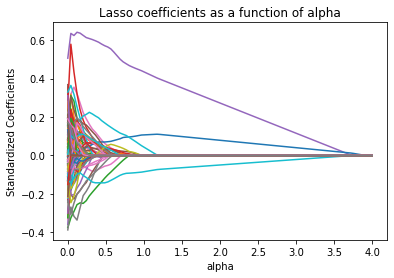

In [44]:
# Initialize list of alphas, Lasso model, coefficients list
alphas = np.linspace(0,4,100)
lasso = Lasso(max_iter=1500)
coefs = []

# Plot the decreasing standardized coefficients for an increasing alpha parameter
for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)

ax = plt.gca()

ax.plot(alphas, coefs)
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Standardized Coefficients')
plt.title('Lasso coefficients as a function of alpha')

In [45]:
feature_names = gene_expression.columns

# Test for multiple random states (different training data partitions if 
# the selected features are different)
for i in range(1,5):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=i)

    # Call model with chosen hyperparameter:
    chosen_lasso = Lasso(alpha = best_alpha)
    chosen_lasso.fit(X_train, y_train)
    
    # Select the features based on importance (now set to 0)
    chosen_features = np.array(feature_names)[abs(chosen_lasso.coef_)> 0]
    print("Selected Features: {}".format(chosen_features))

Selected Features: ['GAL' 'ABCB1' 'TSPAN8' 'SELENBP1' 'TACSTD2' 'AKR1C3']
Selected Features: ['GAL' 'ABCB1' 'TSPAN8' 'RNF128' 'FABP1' 'TACSTD2' 'AKR1C3']
Selected Features: ['GAL' 'ABCB1' 'TSPAN8' 'KRT7' 'TFF3' 'FABP1' 'NGFRAP1' 'TACSTD2' 'AKR1C3']
Selected Features: ['GAL' 'ABCB1' 'TSPAN8' 'TACSTD2' 'PHGR1']


## Bias-variance 

Show the effect of the regularization on the parameter estimates in terms of bias and variance. For this you can repeat the optimization 100 times using bootstrap and visualise the profile of the Lasso regression coefficient over a grid of the hyperparameter, optionally including the variability as error bars.

<p><font color='#770a0a'>Based on the visual analysis of the plot, what are your observation on bias and variance in relation to model complexity? Motivate your answer.</font></p>

The plot reveals a direct relationship between bias, variance, and model complexity as affected by Lasso regularisation. At lower values of $\alpha$, the model exhibits high complexity, retaining many features with large Lasso coefficients. This complexity leads to lower bias, as the model closely fits the training data, but it also results in high variance, showing the model's susceptibility to overfitting. As $\alpha$ increases, the coefficients decrease, and less influential features are removed, simplifying the model. This simplification reduces variance, making the model less sensitive to noise, but also increasing bias as the model may underfit the data by missing important patterns. The error bars, particularly at lower $\alpha$ values, are larger reflecting the higher variability in the coefficient estimates due to the increased complexity and potential overfitting. As $\alpha$ increases, the error bars narrow, indicating reduced variance and more stable coefficients. This illustrates the bias-variance trade-off. From this analysis, it is necessary to perform regularisation on the model in order to balance bias and variance and thus ensure that the model is neither too complex nor simple consequently minimising the generalisation error.

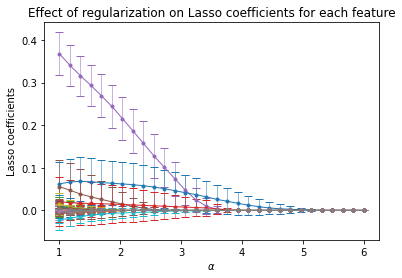

In [46]:
# create array of alpha values
alphas = np.linspace(1, 6, 30)
# plot the effect of the regularization on the parameter estimates
lasso_bootstrap(X,y, alphas, n_bootstrap =10)

## Logistic regression

<p><font color='#770a0a'>Write the expression of the objective function for the penalized logistic regression with $L_1$ and $L_2$ regularisation (as in Elastic net).</font></p>

- L1 is Lasso; Promotes sparcity of varables in a model
- L2 is Ridge; Shrinks large values to make a smoother model
- L1 + L2 is Elastic; Sparcifies the model, but keeps correlated structure via L2

To create the penalized logistic regression, we will have to combine a logistic regression additivly with L1 and L2 regularization.

The logistic regression term is the following:

$\frac{1}{n} \sum_{i=1}^{n} \left( -y_i \log(h_\beta(x_i)) - (1 - y_i) \log(1 - h_\beta(x_i)) \right)$

With 
- n being the number of datapoints
- $y_i$ as the binary label for the i-th datapoint
- $h_\beta(x_i)$ being the sigmoid function 

The $L_1$ term is:

$\lambda \sum_{j=1}^{p} |\beta_j$

Where
- $\lambda$ is the regualrization strength, it determines the regularization terms overal effect
- p is the number of features
- $\beta_j$ represents the model coefficient

The $L_2$ term is:

$(1 - \alpha) \lambda \sum_{j=1}^{p} \beta_j^2$

When combining them additivly and adding $\alpha$, the parameter that determines the balance between L1 and L2 regularization, the following equation is gotten:

$\mathcal{L}(\beta) = \frac{1}{n} \sum_{i=1}^{n} \left( -y_i \log(h_\beta(x_i)) - (1 - y_i) \log(1 - h_\beta(x_i)) \right) + \alpha \lambda \sum_{j=1}^{p} |\beta_j| + (1 - \alpha) \lambda \sum_{j=1}^{p} \beta_j^2$

Sometimes, due to mathmatical convenience during optimization, the L2 term is halfed. So that the derivative of the 2 term amounts to $\lambda \beta_j$ instead of $\lambda 2\beta_j$. So then the following equation is gotten:

$\mathcal{L}(\beta) = \frac{1}{n} \sum_{i=1}^{n} \left( -y_i \log(h_\beta(x_i)) - (1 - y_i) \log(1 - h_\beta(x_i)) \right) + \alpha \lambda \sum_{j=1}^{p} |\beta_j| + \frac{(1 - \alpha)}{2} \lambda \sum_{j=1}^{p} \beta_j^2$

